In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
df=pd.read_csv('/Users/larissalieberson/Desktop/data.csv', 
               low_memory=False)

In [2]:
Same_State = [47140,50420,59430,51832,57006,53430,51354,5960,55584,53740,54567,52362,55035,
55656,49816,55188,47350,53391,13280,53399,51306,54104,14240,56225,55465,17350,5541,15262,53322,
51828,14471,8986,15516,53926,55395,12424,6381,55464,21830,14463,14060,53948,49042,51387,54820,
53932,11830,15998,53880,10606,10555,53458,52930,51853,50226,10726,10002,14974,18454,54493,11517,
50530,55230,15730,10595,5620,45730,14970,10968,6507,52248,52202,13949,15887,19080,14693,13620,
48459,45542,9808]
df["Same_State"]=Same_State



In [3]:
del df["In State Price"]

print(df.head())

     College  Out of State Price  Population State  ACT  Same_State
0  Princeton               47140        5394    NJ   34       47140
1    Harvard               50420        6766    MA   34       50420
2   Columbia               59430        6162    NY   34       59430
3        MIT               51832        4547    MA   34       51832
4   Uchicago               57006        6264    IL   34       57006


In [4]:
df.at[26,"Same_State"]=56382

In [5]:
df.groupby(['State'])[['College']].count()

,College
State,
CA,11
CT,2
DC,3
FL,3
GA,3
IL,3
IN,2
LA,1
MA,10


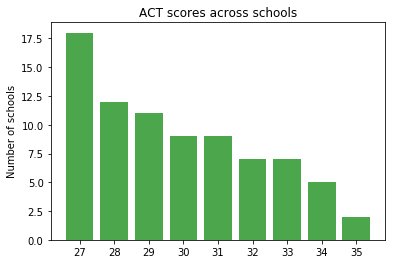

In [6]:
x = [27,28,29,30,31,32,33,34,35]
y = df['ACT'].value_counts()

plt.title('ACT scores across schools')
x_positions = np.arange(len(x)) 
plt.xticks(x_positions, x)
plt.ylabel('Number of schools')
plt.bar(x_positions, y, align='center', alpha=0.7, color='g')
 
plt.show()

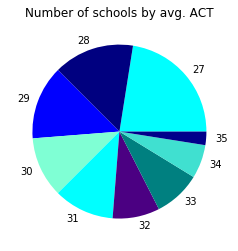

In [7]:
pylab.axes(aspect=1) 

values = df['ACT'].value_counts()
pie_labels = [27,28,29,30,31,32,33,34,35]
color_list = ['aqua', 'navy', 'b', 'aquamarine', 'cyan', 'indigo', 'teal', 'turquoise','darkblue']

pylab.title('Number of schools by avg. ACT')
pylab.pie(values, labels=pie_labels, colors = color_list)


pylab.show()

In [8]:
s=input(str("What state are you from?"))
r=df.loc[df['State']==s]
print("You should look at: ")
print(r["College"])
print("Because price may be lower, at a cost of: ")
print(r["Same_State"])
print("And because you will be close to home!")


What state are you from?
You should look at: 
Series([], Name: College, dtype: object)
Because price may be lower, at a cost of: 
Series([], Name: Same_State, dtype: int64)
And because you will be close to home!


In [9]:
price = np.where(df['Same_State'] == df['Out of State Price'], 'same', 'different')
df["price"]=price

d=df.loc[df['price']=='different']
different=set(d["College"])
print("These colleges are state schools: ")
print(different)

y=df.loc[df['price']=='same']
psame=set(y["College"])
print("These colleges are not state schools: ")
print(psame)

statetest=input(str("Enter a school to find out if it is a state school: "))

if statetest in different:
    print("State school")
elif statetest in psame:
    print("Not a state school")

These colleges are state schools: 
{'Ugeorgia', 'UCSD', 'Ohio State', 'UC Davis', 'UC Berkeley', 'Pittsburgh', 'Penn State', 'UC Santa Cruz', 'UNC', 'Binghamton', 'UWisconsin', 'Virginia Tech', 'UCSB', 'Clemson', 'UMass', 'UWashington', 'Purdue', 'William and Mary', 'Florida State', 'UMichigan', 'UC Irvine', 'UMaryland', 'UVA', 'UFlorida', 'Uillinois', 'UMinnesota', 'Texas A&M', 'Rutgers', 'Utexas', 'UCLA', 'UConnecticut', 'GIT'}
These colleges are not state schools: 
{'Clark', 'Vanderbilt', 'Case Western', 'Umiami', 'NYU', 'Rice', 'RPI', 'Duke', 'Johns Hopkins', 'Fordham', 'Harvard', 'Stevens Institute', 'George Washington', 'Pepperdine', 'Baylor', 'Emory', 'Wake Forest', 'Brandeis', 'Villanova', 'Carnegie Mellon', 'Brown', 'CIT', 'Lehigh', 'Upenn', 'Cornell', 'SMU', 'Boston College', 'Washington University', 'Northwestern', 'Tufts', 'Northeastern', 'Rochester', 'Yale', 'Uchicago', 'American', 'Boston University', 'MIT', 'Tulane', 'Notre Dame', 'USC', 'WPI', 'Georgetown', 'Brigham You

In [ ]:
low_pop=df.loc[df['Population']<5000]
mid_pop = df.loc[(df.Population > 5001) & (df.Population < 15000)]
mid_pop
large_pop=df.loc[df['Population']>15001]
pop_q=input(str('Do you want low, mid, or large pop?'))
good=set()
if pop_q=="low":
    print("The following fit your size criteria: ")
    print(low_pop["College"])
    good=set(low_pop["College"])
elif pop_q=="large":
    print("The following fit your size criteria: ")
    print(large_pop["College"])
    good=set(large_pop["College"])
else:
    print("The following fit your size criteria: ")
    print(mid_pop["College"])
    good=set(mid_pop["College"])
    

In [ ]:
v=input(str("What is your ACT score"))
g=int(v)
b=df.loc[df['ACT']<=g]
print("You have a good shot at: ")
print(b["College"])
u=df.loc[df["ACT"]==g+1]
print("Your reach schools are: ")
print(u["College"])

In [ ]:
bystate=set(r["College"])
byact=set(b["College"])
final=bystate&byact&good
print("The perfect school(s) for you are: ")
print(final)

In [ ]:
#our criteria for a perfect school is based on it being in your home state, 
#as it may be cheaper and is also close to home, desired size, and ACT less
#than or equal to your current score